In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import time
import random
np.random.seed(0) 
random.seed(0)

# Problem description
section 4.1 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
# ms = [5, 5, 12, 10, 6]
# ns = [5, 12, 10, 6, 9]
ms = [20, 30, 40, 25, 35]
ns = [30, 40, 25, 35, 20]
params = ob.sc_params(ms, ns)

# Distributed solution

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [ ]:
ob.add_extra_methods_to_problem(prob)

In [5]:
best_val = np.inf
max_iter = 60

for tau_k in [1, 5, 10]:
    for m_l in [0.2, 0.5, 0.7]:
        for m_f in [0.1, 0.5, 0.7]:
            for mu_max in [1, 5, 10]:
                ds_params = (tau_k, m_l, m_f, mu_max)
                x_agent, x_global = prob.solve_doubly_stabilized(ds_params=ds_params, rel_gap=10**(-5), abs_gap=10**(-5),\
                                                                  max_iter=max_iter, memory=max_iter, tol=1e-6, printing=False)
                if prob.upper_bnd[-1] - prob.lower_bnd[-1] < best_val:
                    best_val = prob.upper_bnd[-1] - prob.lower_bnd[-1] 
                    best_params = ds_params
                rel_gap = prob.get_rel_gap(U=prob.upper_bnd[-1], L=prob.lower_bnd[-1])
                print(f"{ds_params=}, {rel_gap=}, {prob.upper_bnd[-1]=}, {prob.lower_bnd[-1]=}")

print(f"{best_params=}")

ds_params=(1, 0.2, 0.1, 1), rel_gap=0.3540288959848815, prob.upper_bnd[-1]=-78.4631481026662, prob.lower_bnd[-1]=-106.24136980095136
ds_params=(1, 0.2, 0.1, 5), rel_gap=0.2883215259563124, prob.upper_bnd[-1]=-76.96825223699861, prob.lower_bnd[-1]=-99.1598561721604
ds_params=(1, 0.2, 0.1, 10), rel_gap=0.20120469560449825, prob.upper_bnd[-1]=-78.29620460071317, prob.lower_bnd[-1]=-94.04976861438718
ds_params=(1, 0.2, 0.5, 1), rel_gap=3.025865453827384, prob.upper_bnd[-1]=-40.52045463357621, prob.lower_bnd[-1]=-163.12989848269422
ds_params=(1, 0.2, 0.5, 5), rel_gap=1.5673901342538508, prob.upper_bnd[-1]=-55.76275808404603, prob.lower_bnd[-1]=-143.16475496376393
ds_params=(1, 0.2, 0.5, 10), rel_gap=0.7623666849506493, prob.upper_bnd[-1]=-67.84473409653094, prob.lower_bnd[-1]=-119.56729912106152
ds_params=(1, 0.2, 0.7, 1), rel_gap=inf, prob.upper_bnd[-1]=335.1141302212218, prob.lower_bnd[-1]=-415.66884037023135
ds_params=(1, 0.2, 0.7, 5), rel_gap=1.4148196537780022, prob.upper_bnd[-1]=-58.1

/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ds_params=(1, 0.5, 0.5, 10), rel_gap=0.5179229661563359, prob.upper_bnd[-1]=-73.08405943121664, prob.lower_bnd[-1]=-110.9359722705783
ds_params=(1, 0.5, 0.7, 1), rel_gap=inf, prob.upper_bnd[-1]=835.6185224725118, prob.lower_bnd[-1]=-627.4155888828086
ds_params=(1, 0.5, 0.7, 5), rel_gap=6.529906444315778, prob.upper_bnd[-1]=-23.869675200936626, prob.lower_bnd[-1]=-179.73642111925722
ds_params=(1, 0.5, 0.7, 10), rel_gap=1.6699690937223637, prob.upper_bnd[-1]=-51.47623463412924, prob.lower_bnd[-1]=-137.4399555343258
ds_params=(1, 0.7, 0.1, 1), rel_gap=0.36904222190023644, prob.upper_bnd[-1]=-76.84908224365398, prob.lower_bnd[-1]=-105.20963830584606
ds_params=(1, 0.7, 0.1, 5), rel_gap=0.29932694258218184, prob.upper_bnd[-1]=-76.25306142873671, prob.lower_bnd[-1]=-99.07765716873178
ds_params=(1, 0.7, 0.1, 10), rel_gap=0.2871605701505797, prob.upper_bnd[-1]=-76.19071873042716, prob.lower_bnd[-1]=-98.06968896123908
ds_params=(1, 0.7, 0.5, 1), rel_gap=1.549959185308491, prob.upper_bnd[-1]=-55.

In [6]:
best_params # (1, 0.5, 0.1, 10)

(1, 0.5, 0.1, 10)

In [7]:
max_iter = 150
start_time = time.time()
# best_params = (1, 0.5, 0.1, 10)
x_agent, x_global = prob.solve_doubly_stabilized(ds_params=best_params, rel_gap=10**(-5), abs_gap=10**(-5),\
                                                  max_iter=max_iter, memory=max_iter, tol=1e-6, print_freq=20)
print(f"elapsed time = {time.time() - start_time}")

k=0, rel_gap=inf, L=-2074.3559134842617, U=4409.906115002427, L0=-2074.3559134842617
   null step: tau_k=0.5000005, mu_k=1.0000000000082658, L_k=-2074.3559134842617, l_k=1167.7751007590828
k=20, rel_gap=inf, L=-384.3271618375411, U=58.29868364397851, L0=-384.3271618375411
   null step: tau_k=0.004773293565273095, mu_k=2.166624106243595, L_k=-2074.3559134842617, l_k=-314.71856566600394
k=40, rel_gap=1.0757718918738457, L=-124.31297057564598, U=-59.887587389684654, L0=-124.31297057564598
   descent step: tau_k=0.003291211526870509, mu_k=1.94270401819747, L_k=-2074.3559134842617, l_k=-83.20116547155855
k=60, rel_gap=0.1772477403167907, L=-91.42753063332714, U=-77.66209906567713, L0=-91.42753063332714
   null step: tau_k=0.00012806809432372942, mu_k=1.0000000003937277, L_k=-2074.3559134842617, l_k=-80.57629632591136
k=80, rel_gap=0.09531844395160989, L=-88.13637433247618, U=-80.46643861350879, L0=-88.13637433247618
   null step: tau_k=4.7957603012224764e-05, mu_k=16.62713459200249, L_k=-20

In [8]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-87.82539851029742, -80.76678131197102)

# Centralized solution

In [9]:
h_cvx, x_cvx, prob_cvx = ob.cvx_supply_chain(params=params)

In [10]:
h_cvx, prob.upper_bnd[-1]

(-81.1232713273431, -80.76678131197102)

In [11]:
assert prob.lower_bnd[-1] - 1e-8 <= h_cvx <= 1e-8 + prob.upper_bnd[-1], print(prob.lower_bnd[-1], h_cvx, prob.upper_bnd[-1])

# Plot

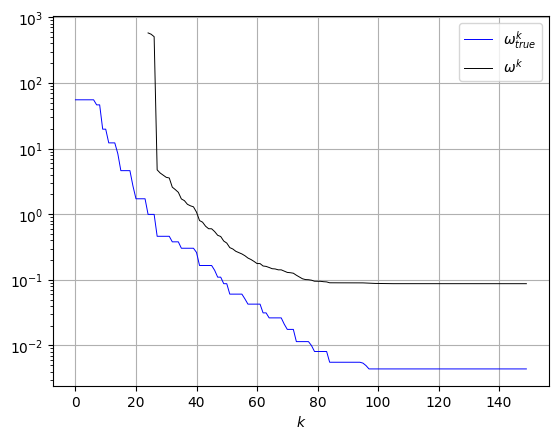

In [12]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='sc_doubly_stab.pdf')

i=79, omega_k=0.09534536457290926, omega_true=0.008096723703164195


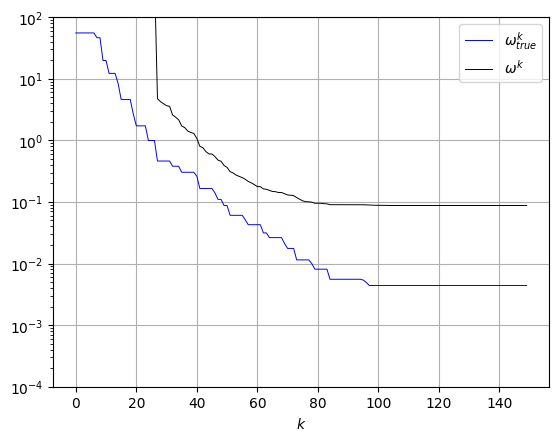

In [13]:
ob.plot_true_rel_gap_uk(y_min=1e-4, y_max=1e2, lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='sc_dsbm_bounds.pdf')